# 利用jupyternote book数据处理

# 一、导入需要的库和数据

1.1首先导入需要的库

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import read_csv
import math
from math import sqrt
from numpy import concatenate
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.layers.core import Dense, Activation, Dropout
%matplotlib inline

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:469: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:470: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\

1.2读入数据查看数据信息

In [2]:
fpath =open("./国能日新竞赛数据/train/train_1.csv")

In [3]:
# 使用pd.read_csv读取数据
train_1 = pd.read_csv(fpath)

In [4]:
# 查看前几行数据
train_1.head()

,时间,辐照度,风速,风向,温度,湿度,压强,实际辐照度,实际功率
0,2017-01-01 00:15:00,-1.0,-0.855915,0.291529,-0.459561,-0.207037,0.043513,0.0,0.039000
1,2017-01-01 00:30:00,-1.0,-0.851950,0.395271,-0.462905,-0.200263,0.042722,0.0,0.039000
2,2017-01-01 00:45:00,-1.0,-0.847984,0.497236,-0.465831,-0.192790,0.041930,0.0,0.042333
3,2017-01-01 01:00:00,-1.0,-0.844019,0.592254,-0.469592,-0.184763,0.041139,0.0,0.042667
4,2017-01-01 01:15:00,-1.0,-0.838731,0.675103,-0.473354,-0.176346,0.040348,0.0,0.042667


In [5]:
# 查看数据的形状，返回(行数、列数)
train_1.shape

(65760, 9)

In [6]:
# 查看列名列表
train_1.columns

Index(['时间', '辐照度', '风速', '风向', '温度', '湿度', '压强', '实际辐照度', '实际功率'], dtype='object')

In [7]:
# 查看索引列
train_1.index

RangeIndex(start=0, stop=65760, step=1)

In [8]:
# 查看每列的数据类型
train_1.dtypes

时间        object
辐照度      float64
风速       float64
风向       float64
温度       float64
湿度       float64
压强       float64
实际辐照度    float64
实际功率     float64
dtype: object

In [9]:
# 设定索引为日期，方便按日期筛选
#train_1.set_index('时间', inplace=True,drop=False)

#还原索引，重新变为默认的整型索引
#train_1.reset_index(inplace=True)

In [10]:
train_1.head()

,时间,辐照度,风速,风向,温度,湿度,压强,实际辐照度,实际功率
0,2017-01-01 00:15:00,-1.0,-0.855915,0.291529,-0.459561,-0.207037,0.043513,0.0,0.039000
1,2017-01-01 00:30:00,-1.0,-0.851950,0.395271,-0.462905,-0.200263,0.042722,0.0,0.039000
2,2017-01-01 00:45:00,-1.0,-0.847984,0.497236,-0.465831,-0.192790,0.041930,0.0,0.042333
3,2017-01-01 01:00:00,-1.0,-0.844019,0.592254,-0.469592,-0.184763,0.041139,0.0,0.042667
4,2017-01-01 01:15:00,-1.0,-0.838731,0.675103,-0.473354,-0.176346,0.040348,0.0,0.042667


In [11]:
#查看所有列的统计结果
train_1.describe()

,辐照度,风速,风向,温度,湿度,压强,实际辐照度,实际功率
count,65760.000000,65760.000000,65760.000000,65760.000000,65760.000000,65760.000000,65760.000000,65760.000000
mean,-0.572925,-0.576995,-0.072429,-0.025342,-0.030450,0.168327,225.503341,3.671769
std,0.564719,0.275753,0.522868,0.381904,0.503106,0.282056,401.529369,5.527401
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-14882.600000,-0.235000
25%,-1.000000,-0.775281,-0.493957,-0.341693,-0.448174,-0.005538,0.000000,-0.054000
50%,-1.000000,-0.641771,-0.340149,-0.015256,-0.097883,0.185127,1.666670,0.039333
75%,-0.142863,-0.447455,0.500361,0.280669,0.382070,0.356804,399.537000,6.736752
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8256.130000,18.939700


In [12]:
#查看单个Series的数据
train_1['压强'].mean()

0.16832700036865683

# 二、相关系数和协方差的计算

In [13]:
#协方差矩阵：衡量同向反向程度;
#如果协方差为正，说明X，Y同向变化，协方差越大说明同向程度越高;如果协方差为负，说明X，Y反向运动，协方差越小说明反向程度越高。
train_1.cov()

,辐照度,风速,风向,温度,湿度,压强,实际辐照度,实际功率
辐照度,0.318908,-0.006086,-0.017015,0.089095,-0.100337,-0.001610,167.116449,2.685082
风速,-0.006086,0.076040,0.048552,-0.000299,-0.029415,-0.002846,-9.349274,-0.123291
风向,-0.017015,0.048552,0.273391,-0.075239,-0.092038,0.004645,-0.281520,0.010538
温度,0.089095,-0.000299,-0.075239,0.145851,0.042248,0.011572,30.756086,0.489092
湿度,-0.100337,-0.029415,-0.092038,0.042248,0.253116,0.038887,-65.138805,-1.064684
压强,-0.001610,-0.002846,0.004645,0.011572,0.038887,0.079556,0.145931,-0.008587
实际辐照度,167.116449,-9.349274,-0.281520,30.756086,-65.138805,0.145931,161225.833788,1776.320009
实际功率,2.685082,-0.123291,0.010538,0.489092,-1.064684,-0.008587,1776.320009,30.552166


In [14]:
# 相关系数矩阵:衡量相似度程度;
#当他们的相关系数为1时，说明两个变量变化时的正向相似度最大，当相关系数为－1时，说明两个变量变化的反向相似度最大.
train_1.corr()

,辐照度,风速,风向,温度,湿度,压强,实际辐照度,实际功率
辐照度,1.000000,-0.039079,-0.057623,0.413110,-0.353157,-0.010111,0.737003,0.860209
风速,-0.039079,1.000000,0.336741,-0.002843,-0.212026,-0.036594,-0.084439,-0.080889
风向,-0.057623,0.336741,1.000000,-0.376787,-0.349879,0.031498,-0.001341,0.003646
温度,0.413110,-0.002843,-0.376787,1.000000,0.219884,0.107432,0.200567,0.231694
湿度,-0.353157,-0.212026,-0.349879,0.219884,1.000000,0.274034,-0.322450,-0.382860
压强,-0.010111,-0.036594,0.031498,0.107432,0.274034,1.000000,0.001289,-0.005508
实际辐照度,0.737003,-0.084439,-0.001341,0.200567,-0.322450,0.001289,1.000000,0.800355
实际功率,0.860209,-0.080889,0.003646,0.231694,-0.382860,-0.005508,0.800355,1.000000


In [15]:
train_1

,时间,辐照度,风速,风向,温度,湿度,压强,实际辐照度,实际功率
0,2017-01-01 00:15:00,-1.000000,-0.855915,0.291529,-0.459561,-0.207037,0.043513,0.000,0.039000
1,2017-01-01 00:30:00,-1.000000,-0.851950,0.395271,-0.462905,-0.200263,0.042722,0.000,0.039000
2,2017-01-01 00:45:00,-1.000000,-0.847984,0.497236,-0.465831,-0.192790,0.041930,0.000,0.042333
3,2017-01-01 01:00:00,-1.000000,-0.844019,0.592254,-0.469592,-0.184763,0.041139,0.000,0.042667
4,2017-01-01 01:15:00,-1.000000,-0.838731,0.675103,-0.473354,-0.176346,0.040348,0.000,0.042667
5,2017-01-01 01:30:00,-1.000000,-0.833443,0.740727,-0.477116,-0.167724,0.039557,0.000,0.042667
6,2017-01-01 01:45:00,-1.000000,-0.826834,0.783847,-0.481296,-0.159020,0.038766,0.000,0.042667
7,2017-01-01 02:00:00,-1.000000,-0.820225,0.799405,-0.485893,-0.150397,0.037184,0.000,0.039333
8,2017-01-01 02:15:00,-1.000000,-0.810972,0.794404,-0.491745,-0.140297,0.036392,0.000,0.049667
9,2017-01-01 02:30:00,-1.000000,-0.800397,0.780624,-0.499687,-0.127404,0.034019,0.000,0.046000


# 三、数据预处理

3.1检测空值

In [16]:
#检测空值
train_1.isnull()

,时间,辐照度,风速,风向,温度,湿度,压强,实际辐照度,实际功率
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False


In [17]:
#检测不是空值
train_1.notnull()

,时间,辐照度,风速,风向,温度,湿度,压强,实际辐照度,实际功率
0,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True
5,True,True,True,True,True,True,True,True,True
6,True,True,True,True,True,True,True,True,True
7,True,True,True,True,True,True,True,True,True
8,True,True,True,True,True,True,True,True,True
9,True,True,True,True,True,True,True,True,True


In [18]:
#筛选有空的所有行
#train_1.loc[train_1["时间","辐照度","风速","风向","温度","湿度","压强","实际辐照度","实际功率"].isnull(),:]
train_1.loc[train_1["时间"].isnull(),:]
train_1.loc[train_1["辐照度"].isnull(),:]
train_1.loc[train_1["风速"].isnull(),:]
train_1.loc[train_1["风向"].isnull(),:]
train_1.loc[train_1["温度"].isnull(),:]
train_1.loc[train_1["湿度"].isnull(),:]
train_1.loc[train_1["压强"].isnull(),:]
train_1.loc[train_1["实际辐照度"].isnull(),:]
train_1.loc[train_1["实际功率"].isnull(),:]

,时间,辐照度,风速,风向,温度,湿度,压强,实际辐照度,实际功率


3.2删掉全是空值的列和行

In [19]:
#删除掉全是空值的列
train_1.dropna(axis="columns", how='all', inplace=True)

#删除掉全是空值的行
train_1.dropna(axis="index", how='all', inplace=True)
train_1

,时间,辐照度,风速,风向,温度,湿度,压强,实际辐照度,实际功率
0,2017-01-01 00:15:00,-1.000000,-0.855915,0.291529,-0.459561,-0.207037,0.043513,0.000,0.039000
1,2017-01-01 00:30:00,-1.000000,-0.851950,0.395271,-0.462905,-0.200263,0.042722,0.000,0.039000
2,2017-01-01 00:45:00,-1.000000,-0.847984,0.497236,-0.465831,-0.192790,0.041930,0.000,0.042333
3,2017-01-01 01:00:00,-1.000000,-0.844019,0.592254,-0.469592,-0.184763,0.041139,0.000,0.042667
4,2017-01-01 01:15:00,-1.000000,-0.838731,0.675103,-0.473354,-0.176346,0.040348,0.000,0.042667
5,2017-01-01 01:30:00,-1.000000,-0.833443,0.740727,-0.477116,-0.167724,0.039557,0.000,0.042667
6,2017-01-01 01:45:00,-1.000000,-0.826834,0.783847,-0.481296,-0.159020,0.038766,0.000,0.042667
7,2017-01-01 02:00:00,-1.000000,-0.820225,0.799405,-0.485893,-0.150397,0.037184,0.000,0.039333
8,2017-01-01 02:15:00,-1.000000,-0.810972,0.794404,-0.491745,-0.140297,0.036392,0.000,0.049667
9,2017-01-01 02:30:00,-1.000000,-0.800397,0.780624,-0.499687,-0.127404,0.034019,0.000,0.046000


3.3缺失值填充

In [20]:
#某列缺失的值填充为0
#train_1.ffill({"列名":0})
#或用
#train_1.loc[:,'列名'] = train_1['列名'].ffillna(0)

#使用前面的有效值填充，用ffill：forward fill ;bfill使用后一个不为空的值填充backword fill
#train_1.loc[:, '列名'] = train_1['列名'].fillna(method="ffill")

#保存
#train_1.to_excel("./datas/student_excel/student_excel_clean.xlsx", index=False)

# 四、按日、月进行数据分组

In [21]:
train_1.head(10)
train = train_1.copy()

新增year、 month、day、time列，
暂时不运行如下代码

In [22]:
train

,时间,辐照度,风速,风向,温度,湿度,压强,实际辐照度,实际功率
0,2017-01-01 00:15:00,-1.000000,-0.855915,0.291529,-0.459561,-0.207037,0.043513,0.000,0.039000
1,2017-01-01 00:30:00,-1.000000,-0.851950,0.395271,-0.462905,-0.200263,0.042722,0.000,0.039000
2,2017-01-01 00:45:00,-1.000000,-0.847984,0.497236,-0.465831,-0.192790,0.041930,0.000,0.042333
3,2017-01-01 01:00:00,-1.000000,-0.844019,0.592254,-0.469592,-0.184763,0.041139,0.000,0.042667
4,2017-01-01 01:15:00,-1.000000,-0.838731,0.675103,-0.473354,-0.176346,0.040348,0.000,0.042667
5,2017-01-01 01:30:00,-1.000000,-0.833443,0.740727,-0.477116,-0.167724,0.039557,0.000,0.042667
6,2017-01-01 01:45:00,-1.000000,-0.826834,0.783847,-0.481296,-0.159020,0.038766,0.000,0.042667
7,2017-01-01 02:00:00,-1.000000,-0.820225,0.799405,-0.485893,-0.150397,0.037184,0.000,0.039333
8,2017-01-01 02:15:00,-1.000000,-0.810972,0.794404,-0.491745,-0.140297,0.036392,0.000,0.049667
9,2017-01-01 02:30:00,-1.000000,-0.800397,0.780624,-0.499687,-0.127404,0.034019,0.000,0.046000


In [23]:
#新增year、 month、day、time列， 暂时不运行如下代码
#新增一列为年份
train_1['year']=train_1['时间'].str[:4]
#新增一列为月份
train_1['month']=train_1['时间'].str[:7]
#新增一列为日
train_1['day']=train_1['时间'].str[:10]
#新增一列为时间
train_1['time'] = train_1['时间'].str[10:16]
train_1.head(10)

,时间,辐照度,风速,风向,温度,湿度,压强,实际辐照度,实际功率,year,month,day,time
0,2017-01-01 00:15:00,-1.0,-0.855915,0.291529,-0.459561,-0.207037,0.043513,0.0,0.039000,2017,2017-01,2017-01-01,00:15
1,2017-01-01 00:30:00,-1.0,-0.851950,0.395271,-0.462905,-0.200263,0.042722,0.0,0.039000,2017,2017-01,2017-01-01,00:30
2,2017-01-01 00:45:00,-1.0,-0.847984,0.497236,-0.465831,-0.192790,0.041930,0.0,0.042333,2017,2017-01,2017-01-01,00:45
3,2017-01-01 01:00:00,-1.0,-0.844019,0.592254,-0.469592,-0.184763,0.041139,0.0,0.042667,2017,2017-01,2017-01-01,01:00
4,2017-01-01 01:15:00,-1.0,-0.838731,0.675103,-0.473354,-0.176346,0.040348,0.0,0.042667,2017,2017-01,2017-01-01,01:15
5,2017-01-01 01:30:00,-1.0,-0.833443,0.740727,-0.477116,-0.167724,0.039557,0.0,0.042667,2017,2017-01,2017-01-01,01:30
6,2017-01-01 01:45:00,-1.0,-0.826834,0.783847,-0.481296,-0.159020,0.038766,0.0,0.042667,2017,2017-01,2017-01-01,01:45
7,2017-01-01 02:00:00,-1.0,-0.820225,0.799405,-0.485893,-0.150397,0.037184,0.0,0.039333,2017,2017-01,2017-01-01,02:00
8,2017-01-01 02:15:00,-1.0,-0.810972,0.794404,-0.491745,-0.140297,0.036392,0.0,0.049667,2017,2017-01,2017-01-01,02:15
9,2017-01-01 02:30:00,-1.0,-0.800397,0.780624,-0.499687,-0.127404,0.034019,0.0,0.046000,2017,2017-01,2017-01-01,02:30


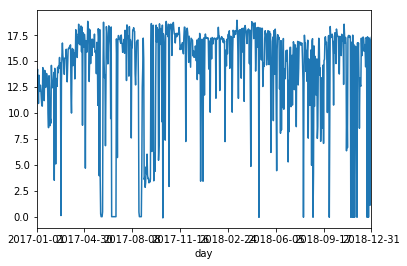

In [24]:
#查看每天的最高实际功率
real_power = train_1.groupby('day')['实际功率'].max()
#具体数据
real_power.head(10)
#画图
real_power.plot()

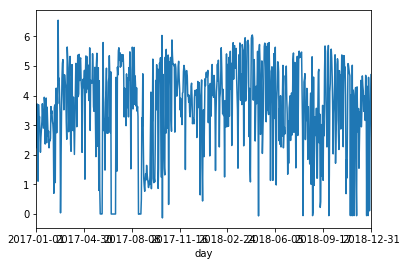

In [25]:
#计算每天的的平均功率并画图
real_power_mean = train_1.groupby('day')['实际功率'].mean()
real_power_mean.head(10)
real_power_mean.plot()

In [26]:
#按照 年 、月、日分层计算 平均功率
real_power_mean = train_1.groupby(['year','month','day'])['实际功率'].mean()
real_power_mean.head(10)
#real_power_mean.plot()

year  month    day       
2017  2017-01  2017-01-01    2.244348
               2017-01-02    3.219417
               2017-01-03    3.720179
               2017-01-04    3.418879
               2017-01-05    1.109004
               2017-01-06    3.696466
               2017-01-07    3.075219
               2017-01-08    3.291538
               2017-01-09    2.710279
               2017-01-10    2.089318
Name: 实际功率, dtype: float64

In [27]:
train_1.head(10)

,时间,辐照度,风速,风向,温度,湿度,压强,实际辐照度,实际功率,year,month,day,time
0,2017-01-01 00:15:00,-1.0,-0.855915,0.291529,-0.459561,-0.207037,0.043513,0.0,0.039000,2017,2017-01,2017-01-01,00:15
1,2017-01-01 00:30:00,-1.0,-0.851950,0.395271,-0.462905,-0.200263,0.042722,0.0,0.039000,2017,2017-01,2017-01-01,00:30
2,2017-01-01 00:45:00,-1.0,-0.847984,0.497236,-0.465831,-0.192790,0.041930,0.0,0.042333,2017,2017-01,2017-01-01,00:45
3,2017-01-01 01:00:00,-1.0,-0.844019,0.592254,-0.469592,-0.184763,0.041139,0.0,0.042667,2017,2017-01,2017-01-01,01:00
4,2017-01-01 01:15:00,-1.0,-0.838731,0.675103,-0.473354,-0.176346,0.040348,0.0,0.042667,2017,2017-01,2017-01-01,01:15
5,2017-01-01 01:30:00,-1.0,-0.833443,0.740727,-0.477116,-0.167724,0.039557,0.0,0.042667,2017,2017-01,2017-01-01,01:30
6,2017-01-01 01:45:00,-1.0,-0.826834,0.783847,-0.481296,-0.159020,0.038766,0.0,0.042667,2017,2017-01,2017-01-01,01:45
7,2017-01-01 02:00:00,-1.0,-0.820225,0.799405,-0.485893,-0.150397,0.037184,0.0,0.039333,2017,2017-01,2017-01-01,02:00
8,2017-01-01 02:15:00,-1.0,-0.810972,0.794404,-0.491745,-0.140297,0.036392,0.0,0.049667,2017,2017-01,2017-01-01,02:15
9,2017-01-01 02:30:00,-1.0,-0.800397,0.780624,-0.499687,-0.127404,0.034019,0.0,0.046000,2017,2017-01,2017-01-01,02:30


画出2017年1月1日的功率图

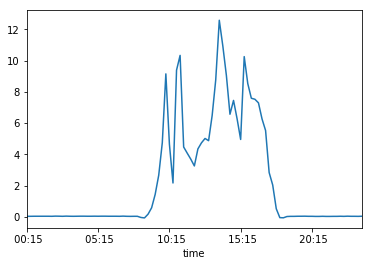

In [28]:
#画出2017年1月1日的功率图
#real_power_day = train_1.groupby('day')
real_power_day = train_1.loc[train_1['day'] == '2017-01-01',:]
#real_power_day.set_index('time', inplace=False)
real_power_day_ =real_power_day.set_index('time', inplace=False)['实际功率']
fig = plt.figure()
#ax = fig.add_subplot(1,1,1)
#ax.plot(real_power_day_)
real_power_day_.plot()
#real_power_day_.set_axis(['00:15:00','06:15:00','12:15:00','18:15:00'])
#real_power_day_

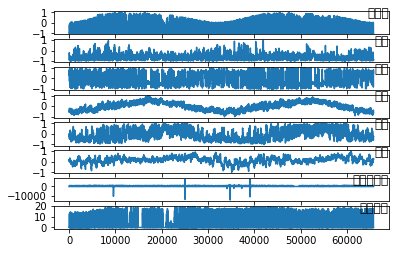

In [29]:
#画出每个特征的总体趋势图
from matplotlib import pyplot
values = train_1.values
groups = [1,2,3,4,5,6,7,8]
i = 1
pyplot.figure()
for group in groups:
    pyplot.subplot(len(groups),1,i)
    pyplot.plot(values[:,group])
    pyplot.title(train_1.columns[group], y=0.5, loc='right')
    i += 1
pyplot.show()

In [30]:
train_1.columns[[0,9,10,11,12]]

Index(['时间', 'year', 'month', 'day', 'time'], dtype='object')

In [31]:
train.head(10)

,时间,辐照度,风速,风向,温度,湿度,压强,实际辐照度,实际功率
0,2017-01-01 00:15:00,-1.0,-0.855915,0.291529,-0.459561,-0.207037,0.043513,0.0,0.039000
1,2017-01-01 00:30:00,-1.0,-0.851950,0.395271,-0.462905,-0.200263,0.042722,0.0,0.039000
2,2017-01-01 00:45:00,-1.0,-0.847984,0.497236,-0.465831,-0.192790,0.041930,0.0,0.042333
3,2017-01-01 01:00:00,-1.0,-0.844019,0.592254,-0.469592,-0.184763,0.041139,0.0,0.042667
4,2017-01-01 01:15:00,-1.0,-0.838731,0.675103,-0.473354,-0.176346,0.040348,0.0,0.042667
5,2017-01-01 01:30:00,-1.0,-0.833443,0.740727,-0.477116,-0.167724,0.039557,0.0,0.042667
6,2017-01-01 01:45:00,-1.0,-0.826834,0.783847,-0.481296,-0.159020,0.038766,0.0,0.042667
7,2017-01-01 02:00:00,-1.0,-0.820225,0.799405,-0.485893,-0.150397,0.037184,0.0,0.039333
8,2017-01-01 02:15:00,-1.0,-0.810972,0.794404,-0.491745,-0.140297,0.036392,0.0,0.049667
9,2017-01-01 02:30:00,-1.0,-0.800397,0.780624,-0.499687,-0.127404,0.034019,0.0,0.046000


In [32]:
train = train[['辐照度','风速','风向','温度','湿度','压强','实际辐照度','实际功率']]
train.head(1)

,辐照度,风速,风向,温度,湿度,压强,实际辐照度,实际功率
0,-1.0,-0.855915,0.291529,-0.459561,-0.207037,0.043513,0.0,0.039


In [33]:
# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg
 
# load dataset
#dataset = read_csv('pollution.csv', header=0, index_col=0)
train_values = train.values
# integer encode direction
#encoder = LabelEncoder()
#values[:,4] = encoder.fit_transform(values[:,4])
# ensure all data is float
#train_values = train_values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(train_values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)
# drop columns we don't want to predict
#reframed.drop(reframed.columns[[24,25,26,27,28,29,30]], axis=1, inplace=True)
reframed.drop(reframed.columns[[8,9,10,11,12,13,14]], axis=1, inplace=True)
print(reframed.head())

   var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)  var6(t-1)  \
1        0.0   0.072042   0.645764   0.270219   0.396481   0.521756   
2        0.0   0.074025   0.697636   0.268548   0.399869   0.521361   
3        0.0   0.076008   0.748618   0.267085   0.403605   0.520965   
4        0.0   0.077991   0.796127   0.265204   0.407618   0.520570   
5        0.0   0.080635   0.837552   0.263323   0.411827   0.520174   

   var7(t-1)  var8(t-1)   var8(t)  
1    0.64319   0.014290  0.014290  
2    0.64319   0.014290  0.014463  
3    0.64319   0.014463  0.014481  
4    0.64319   0.014481  0.014481  
5    0.64319   0.014481  0.014481  


In [34]:
reframed.shape

(65759, 9)

In [35]:
# split into train and test sets
values = reframed.values
n_train_hours = 365 * 24 * 4 - 2193
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]
#train.shape
#test.shape
n_train_hours

32847

In [36]:
# split into input and outputs
train_X, train_y = train[:, : -1], train[:,-1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(32847, 1, 8) (32847,) (32912, 1, 8) (32912,)


Train on 32847 samples, validate on 32912 samples
Epoch 1/50
6s - loss: 0.0672 - val_loss: 0.0463
Epoch 2/50
5s - loss: 0.0342 - val_loss: 0.0372
Epoch 3/50
5s - loss: 0.0296 - val_loss: 0.0365
Epoch 4/50
5s - loss: 0.0285 - val_loss: 0.0362
Epoch 5/50
5s - loss: 0.0278 - val_loss: 0.0351
Epoch 6/50
5s - loss: 0.0273 - val_loss: 0.0340
Epoch 7/50
5s - loss: 0.0278 - val_loss: 0.0403
Epoch 8/50
4s - loss: 0.0281 - val_loss: 0.0349
Epoch 9/50
4s - loss: 0.0277 - val_loss: 0.0345
Epoch 10/50
4s - loss: 0.0274 - val_loss: 0.0398
Epoch 11/50
5s - loss: 0.0275 - val_loss: 0.0348
Epoch 12/50
4s - loss: 0.0272 - val_loss: 0.0346
Epoch 13/50
4s - loss: 0.0269 - val_loss: 0.0418
Epoch 14/50
5s - loss: 0.0275 - val_loss: 0.0353
Epoch 15/50
5s - loss: 0.0273 - val_loss: 0.0398
Epoch 16/50
4s - loss: 0.0273 - val_loss: 0.0344
Epoch 17/50
5s - loss: 0.0269 - val_loss: 0.0347
Epoch 18/50
5s - loss: 0.0269 - val_loss: 0.0336
Epoch 19/50
4s - loss: 0.0267 - val_loss: 0.0351
Epoch 20/50
5s - loss: 0.027

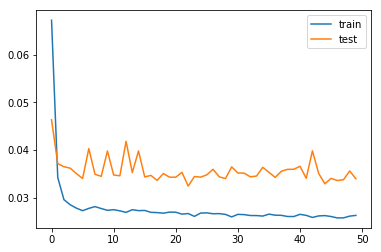

In [37]:
# design network
model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(train_X, train_y, epochs=50, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [38]:
# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
# invert scaling for forecast
inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 0.125
